Program Name: Jet_Length_Width_Determiner_KS-test_Draft1.py

Date: 6/14/2022

Creator: Sol Samuels

Description: 
 - This program intakes two jet related FITS files from ones device, specifically those named in the format \*\*/Group\*0.00_1.00_0.00\*.fits\* , and returns a KS-test graph comparing the two files normalized cumulative intensity values.
 - Draft 1. Not currently functional.
 - NOTE: This is version 1 of this program. Program is subject to be changed.
 
Variable Keywords:
 - cul = "cumulative"
 - slice = refers to rows or columns of fits image pixels
 - vals = "values"
 - norm = "normalized"

In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
#This Function Takes FITS data and pixel size to display Jet Length Info
def jet_length(data, pixel_size):
    
    #Creates list of slice sums
    slice_vals = []
    for row in data:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    final_reached = False
    norm_cul_vals_edit = []
    for element in norm_cul_vals:
        if element != 0 and final_reached is False:
            norm_cul_vals_edit.append(element)
        if element == 1:
            final_reached = True

    
    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element >= 0.02 and element <= 0.98:
            pixel_count += 1

    #Converts pixel size to cm and prints
    jet_size_cm = pixel_size * pixel_count
    
    #Converts cm size to kpc and prints
    jet_size_kpc = round((jet_size_cm * 3.24077928967e-19) / 1e3, 4)
    
    return norm_cul_vals_edit

In [3]:
#This Function Takes FITS data, FITS image width and pixel size to display Jet Width Info
def jet_width(data, width, pixel_size):
    
    #Reorients data so rows become columns
    data_reorient = []
    for x in range(width):
        col_sub = []
        for row in data:
            col_sub.append(row[x])
        data_reorient.append(col_sub)
        
    #Creates list of slice sums
    slice_vals = []
    for row in data_reorient:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    final_reached = False
    norm_cul_vals_edit = []
    for element in norm_cul_vals:
        if element != 0 and final_reached is False:
            norm_cul_vals_edit.append(element)
        if element == 1:
            final_reached = True

    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element >= 0.02 and element <= 0.98:
            pixel_count += 1

    #Converts pixel size to cm and prints
    jet_size_cm = pixel_size * pixel_count
    
    #Converts cm size to kpc and prints
    jet_size_kpc = round((jet_size_cm * 3.24077928967e-19) / 1e3, 4)
    
    return norm_cul_vals_edit
    

In [4]:
#Main Calling Block of Code

print("\nJET LENGTH AND WIDTH DETERMINING PROGRAM:")
print("{}\n".format("_"*100))

path1 = '**/Group*nu=30.0*0.00_1.00_0.00*_4.0Myr.fits*'
compare_path = '**/Group*nu=150.0*0.00_1.00_0.00*_4.0Myr.fits*'

path = path1

# Determines if there are any files in device
total_files = len(glob.glob(path, recursive=True))

if total_files > 0:
    file_count = 0
    for file in glob.glob(path, recursive=True):

        file_count += 1

        try:
            print("File Number {}/{}\n".format(file_count, total_files))
            print("File Name: {}".format(file))
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            print("Time index: {}".format(sim_time))
            print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])

            #Defines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))


            jet_len = jet_length(data, pixel_size)
            x_vals = []
            kpc_vals = []
            for x in range(len(jet_len)):
                cm = (pixel_size * x)
                kpc = round((cm * 3.24077928967e-19) / 1e3, 4)
                x_vals.append(x)
                kpc_vals.append(kpc)


            jet_wid = jet_width(data, width, pixel_size)
            x2_vals = []
            kpc2_vals = []
            for x2 in range(len(jet_wid)):
                cm = (pixel_size * x)
                kpc = round((cm * 3.24077928967e-19) / 1e3, 4)
                x2_vals.append(x2)
                kpc2_vals.append(kpc)

        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")

else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))

    


JET LENGTH AND WIDTH DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1/1

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 4.0 Myr - 30 MHz
Time index: 4.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 144x144 pixels 



In [5]:
path = compare_path

# Determines if there are any files in device
total_files = len(glob.glob(path, recursive=True))

if total_files > 0:
    file_count = 0
    for file in glob.glob(path, recursive=True):

        file_count += 1

        try:
            print("File Number {}/{}\n".format(file_count, total_files))
            print("File Name: {}".format(file))
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            print("Time index: {}".format(sim_time))
            print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])

            #Difines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))


            jet_len_compare = jet_length(data, pixel_size)

            jet_wid_compare = jet_width(data, width, pixel_size)
            
            
        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")

else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))
        

File Number 1/1

File Name: nu=150.0MHz/Group_L446_rc30_beta07_0040_nu=150.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 4.0 Myr - 150 MHz
Time index: 4.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 144x144 pixels 



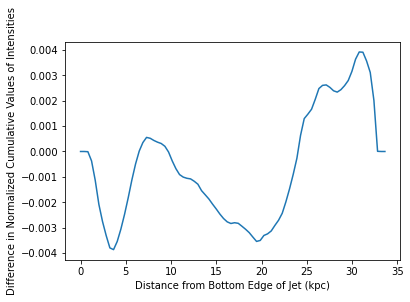

In [6]:
length_difference = []
for i in x_vals:
    diff = jet_len[i] - jet_len_compare[i]
    length_difference.append(diff)
    
plt.plot(kpc_vals, length_difference)
plt.xlabel("Distance from Bottom Edge of Jet (kpc)")
plt.ylabel("Difference in Normalized Cumulative Values of Intensities")
plt.show()

In [7]:

width_difference = []
for i in x2_vals:
    diff = jet_wid[i] - jet_wid_compare[i]
    width_difference.append(diff)
    
plt.plot(kpc2_vals, length_difference)
plt.xlabel("Distance from Bottom Edge of Jet (kpc)")
plt.ylabel("Difference in Normalized Cumulative Values of Intensities")
plt.show()

IndexError: list index out of range